In [1]:
from torchvision.datasets import OxfordIIITPet

pet_trainval = OxfordIIITPet(root='../4-segmentation/data', split='trainval', target_types="segmentation", download=True)
pet_test = OxfordIIITPet(root='../4-segmentation/data', split='test', target_types="segmentation", download=True)
pet_trainval, pet_test

(Dataset OxfordIIITPet
     Number of datapoints: 3680
     Root location: ../4-segmentation/data,
 Dataset OxfordIIITPet
     Number of datapoints: 3669
     Root location: ../4-segmentation/data)

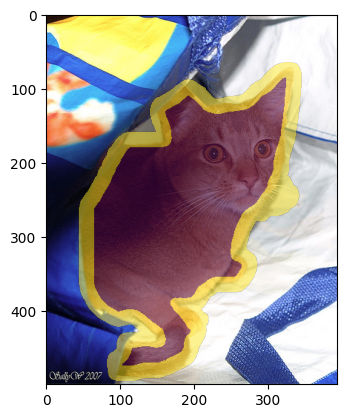

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(pet_trainval[0][0])
mask = np.array(pet_trainval[0][1])
mask = np.ma.masked_where(mask == 2, mask)
plt.imshow(mask, alpha=0.5)

torch.Size([1, 64, 768])


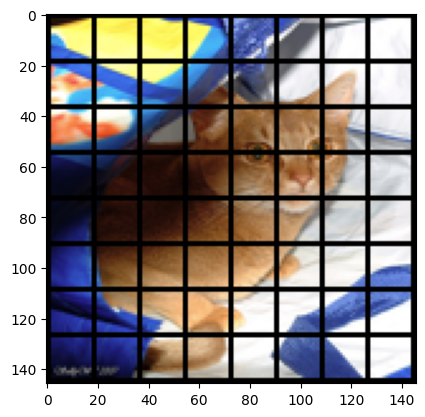

In [3]:
from importlib import reload
from src import image_to_patches
reload(image_to_patches)
from src.image_to_patches import ImageToPatches
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

patch_size = 16
image_to_patches = ImageToPatches(patch_size=patch_size)
image = pet_trainval[0][0].resize((128, 128))
image = ToTensor()(image).unsqueeze(0)
patches = image_to_patches(image) # (batch_size, num_patches, channels * patch_size * patch_size)
print(patches.shape)

patches = patches.view(64, 3, 16, 16) # (num_patches, channels, patch_size, patch_size)
grid_image = make_grid(patches, nrow=8)
plt.imshow(grid_image.permute(1,2,0)) # (C, H, W) -> (H, W, C)

In [4]:
from src import image_to_patches, patch_embedding
from importlib import reload
reload(image_to_patches)
reload(patch_embedding)
from src.image_to_patches import ImageToPatches
from src.patch_embedding import PatchEmbedding
from torchvision.transforms import ToTensor

patch_size = 16
image_to_patches = ImageToPatches(patch_size=patch_size)
image = pet_trainval[0][0].resize((128, 128))
image = ToTensor()(image).unsqueeze(0)
patches = image_to_patches(image) # (batch_size, num_patches, channels * patch_size * patch_size)
print(patches.shape)

patch_embedding = PatchEmbedding(in_channels_size=768, out_embedding_size=512)

embeddings = patch_embedding(patches)

print("Patch Embeddings Shape:", embeddings.shape)


torch.Size([1, 64, 768])
Patch Embeddings Shape: torch.Size([1, 64, 512])


In [6]:
from torch import randn
from src import multi_layer_perceptron
from importlib import reload
reload(multi_layer_perceptron)
from src.multi_layer_perceptron import MultiLayerPerceptron

print("MultiLayerPerceptron")
x = randn(10, 50, 60)
mlp = MultiLayerPerceptron(embed_size=60, dropout_probability=0.2)
y = mlp(x)
print(f"{x.shape} -> {y.shape}")

MultiLayerPerceptron
torch.Size([10, 50, 60]) -> torch.Size([10, 50, 60])


In [10]:
from torch import randn
from src import self_attention_encoder_block
from importlib import reload
reload(self_attention_encoder_block)
from src.self_attention_encoder_block import SelfAttentionEncoderBlock

print("SelfAttentionEncoderBlock")
x = randn(10, 20, 256)
attention_block = SelfAttentionEncoderBlock(256, 8, dropout_probability=0.2)
y = attention_block(x)
print(f"{x.shape} -> {y.shape}")

SelfAttentionEncoderBlock
torch.Size([10, 20, 256]) -> torch.Size([10, 20, 256])
